## Regresja liniowa

In [ ]:
!wget https://raw.githubusercontent.com/jgrynczewski/datascience_demo/main/weights_heights.csv

--2024-01-06 13:16:12--  https://raw.githubusercontent.com/jgrynczewski/datascience_demo/main/weights_heights.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 583327 (570K) [text/plain]
Saving to: ‘weights_heights.csv’

weights_heights.csv 100%[===================>] 569.66K  --.-KB/s    in 0.007s  

2024-01-06 13:16:12 (79.7 MB/s) - ‘weights_heights.csv’ saved [583327/583327]



# 1. Popatrzmy na dane

In [ ]:
# Import potrzebnych bibliotek

import pandas as pd
import seaborn as sns
import numpy as np
import scipy
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_csv('weights_heights.csv', index_col='Index')
data.head(10)

,Height,Weight
Index,,
1,65.78331,112.9925
2,71.51521,136.4873
3,69.39874,153.0269
4,68.21660,142.3354
5,67.78781,144.2971
6,68.69784,123.3024
7,69.80204,141.4947
8,70.01472,136.4623
9,67.90265,112.3723


In [ ]:
data.describe()

,Height,Weight
count,25000.000000,25000.000000
mean,67.993114,127.079421
std,1.901679,11.660898
min,60.278360,78.014760
25%,66.704397,119.308675
50%,67.995700,127.157750
75%,69.272958,134.892850
max,75.152800,170.924000


In [ ]:
# Wysokość przeliczamy na metry
data["Height"] = data["Height"] * 0.0254

In [ ]:
# Wagę przeliczamy na kilogramy
data["Weight"] = data["Weight"] * 0.4536

In [ ]:
# Wyświetlamy jeszcze raz data
data.head(10)

,Height,Weight
Index,,
1,1.670896,51.253398
2,1.816486,61.910639
3,1.762728,69.413002
4,1.732702,64.563337
5,1.721810,65.453165
6,1.744925,55.929969
7,1.772972,64.181996
8,1.778374,61.899299
9,1.724727,50.972075


In [ ]:
data[["Height", "Weight"]].corr()

,Height,Weight
Height,1.000000,0.502859
Weight,0.502859,1.000000


<Axes: title={'center': 'Height distribution'}, xlabel='Index'>

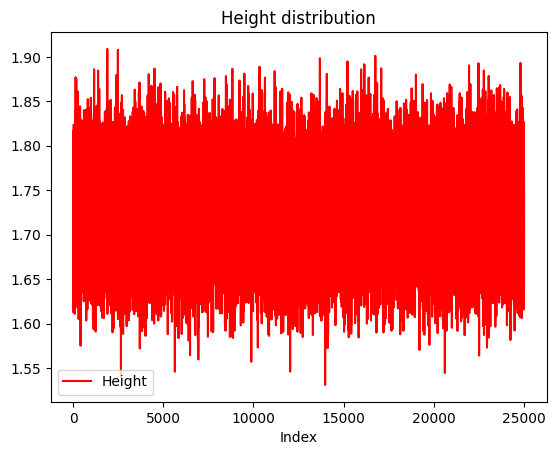

In [ ]:
data.plot(y="Height", color="red", title="Height distribution")

<Axes: title={'center': 'Weight distribution'}, xlabel='Index'>

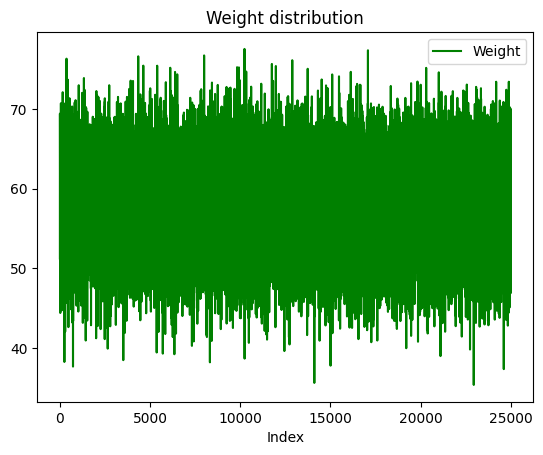

In [ ]:
data.plot(y="Weight", color="green", title="Weight distribution")

<Axes: title={'center': 'Height distribution'}, ylabel='Frequency'>

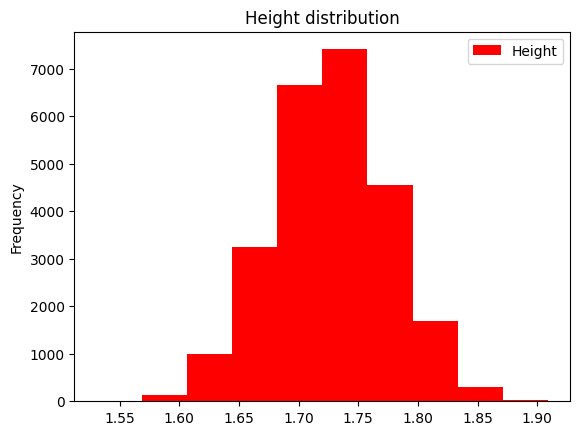

In [ ]:
data.plot(y="Height", kind="hist", color="red", title="Height distribution")

<Axes: title={'center': 'Weight distribution'}, ylabel='Frequency'>

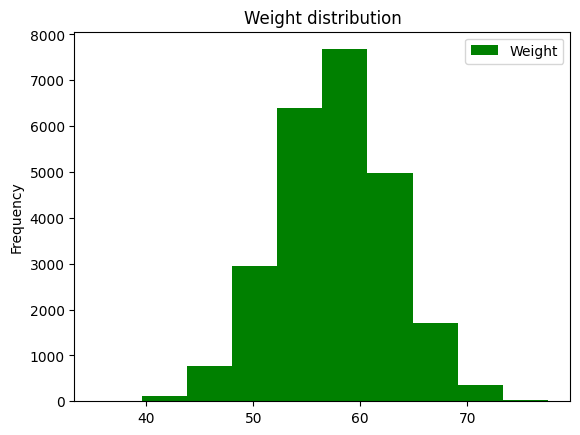

In [ ]:
data.plot(y="Weight", kind='hist', color="green", title="Weight distribution")

In [ ]:
def calc_bmi(height, weight):
  return weight / (height**2)

<Axes: title={'center': 'Height vs Weight'}, xlabel='Weight', ylabel='Height'>

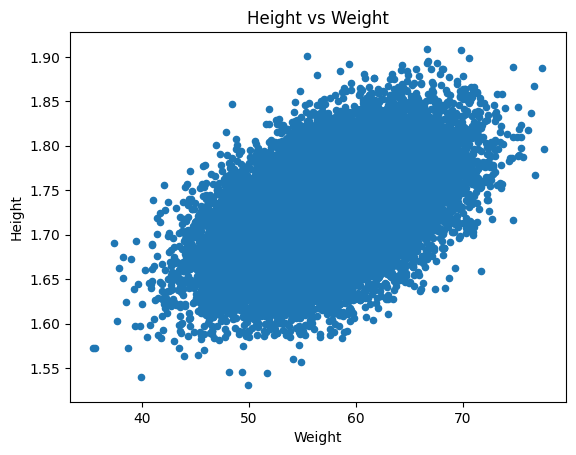

In [ ]:
data.plot(y='Height', x='Weight', kind='scatter', title='Height vs Weight')

Minimalizacja funkcji błędu

In [ ]:
# Przygotowanie danych pod minimalizację
# mnożenie macierzowe jako uogólnienie iloczynu skalarnego.

X = np.array([(x, 1) for x in data["Weight"]])  # dlaczego tak? mnożenie macierzowe
# -> y = w1*x + w0  <=> Y = w * X, gdzie w = [w1, w0], a X = [(x0, 1), (x1, 1), ...]
Y = data['Height']
print(X)
print(Y)

[[51.253398    1.        ]
 [61.91063928  1.        ]
 [69.41300184  1.        ]
 ...
 [53.6452308   1.        ]
 [59.99685552  1.        ]
 [56.6428464   1.        ]]
Index
1        1.670896
2        1.816486
3        1.762728
4        1.732702
5        1.721810
           ...   
24996    1.765355
24997    1.639526
24998    1.643343
24999    1.715241
25000    1.749491
Name: Height, Length: 25000, dtype: float64


In [ ]:
# funkcja błędu

def error(w, X, Y):
  err = Y - np.matmul(X, w)
  return err.dot(err)

In [ ]:
# minimalizacja

# początkowy strzał
x0 = np.array([0, 0])

# scipy.optimize.minimize - minimization of scalar function of one or more variables

# parameters:
# fun: callable, the objective function to be minimized
# x0: ndarray, shape(n,) - initial guess  - that's how the minimize function
#                                           deduce the dimiension of the first
#                                           parameter of the fun.
# args: tuple (optional) - extra arguments passed to the objective function
#                          and its derivatives
# method str or callable - type od solver. If not given, chosen to be one
#                          of BFGS, L-BFGS-B, SLSQP, depending on whether
#                          or not the problem has constraints or bounds.
# bounds - sequence or Bounce (optional)

# returns:
# res: OptimizeResult
# The optimization result represented as a OptimizeResult object. Important
# attributes are: x the solution array, success a Boolean flag indicating
# if the optimizer exited successfully
result = scipy.optimize.minimize(
    error,
    x0=x0,
    args=(X, Y),
    method='L-BFGS-B',
    bounds=((-100, 100), (-10,10))
)

[[51.253398    1.        ]
 [61.91063928  1.        ]
 [69.41300184  1.        ]
 ...
 [53.6452308   1.        ]
 [59.99685552  1.        ]
 [56.6428464   1.        ]]


In [ ]:
w1, w0 = result.x
print(w1)
print(w0)

0.004591526341269746
1.462354686822913


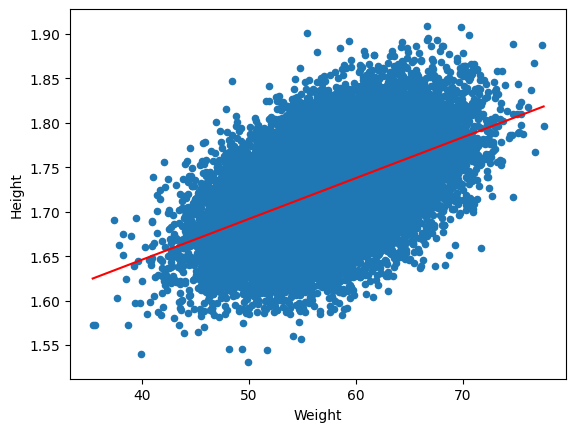

In [ ]:
x = np.linspace(min(data['Weight']), max(data['Weight']), 100)
y = w0 + x * w1   # hipoteza: korelacje pomiędzy wartościami height i weight można opisać funkcją liniową (regresja liniowa)

data.plot(
    y='Height',
    x='Weight',
    kind='scatter'
)

plt.plot(x, y, '-r')
plt.show()

In [ ]:
# Przewidywanie

x = 80
y = w0 + x*w1
print(y)

1.8296767941244927
